In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("solar-electric-programs-reported-by-nyserda-beginning-2000.csv")

In [3]:
df.head()

,City,County,Sector,Program Type,Electric Utility,Purchase Type,Date Application Received,Date Completed,Project Status,Total Inverter Quantity,Total PV Module Quantity,Project Cost,$Incentive,Total Nameplate kW DC,Expected KWh Annual Production,Affordable Solar,Community Distributed Generation,Contractor
0,Scotia,Schenectady,Residential,Residential/Small Commercial,National Grid,Purchase,2014-09-03T00:00:00.000,2014-12-17T00:00:00.000,Complete,1.0,20.0,22950.00,5100.0,5.10,5987,No,No,"Monolith Solar Associates, LLC"
1,Ridge,Suffolk,Residential,Residential/Small Commercial,PSEG Long Island,Lease,2015-12-15T00:00:00.000,2016-07-26T00:00:00.000,Complete,1.0,24.0,38552.20,1570.0,7.85,9212,No,No,Harvest Power
2,Montrose,Westchester,Residential,Residential/Small Commercial,Consolidated Edison,Purchase,2013-04-10T00:00:00.000,2013-09-03T00:00:00.000,Complete,32.0,32.0,40900.00,9800.0,7.68,9015,No,No,Green Hybrid Energy Solutions
3,Bronx,Bronx,Residential,Residential/Small Commercial,Consolidated Edison,Lease,2012-05-01T00:00:00.000,2013-04-08T00:00:00.000,Complete,1.0,11.0,20832.35,4043.0,2.70,3163,No,No,Sungevity Development LLC
4,Bellmore,Nassau,Residential,Residential/Small Commercial,PSEG Long Island,Lease,2014-11-04T00:00:00.000,2015-04-17T00:00:00.000,Complete,2.0,31.0,44268.00,1391.0,7.91,9279,No,No,Tesla Energy Operations Inc.


In [4]:
df.shape

(101909, 18)

In [5]:
for i in df.columns:
    print(i,df[i].isnull().sum())

City 0
County 0
Sector 0
Program Type 0
Electric Utility 0
Purchase Type 5108
Date Application Received 0
Date Completed 3861
Project Status 0
Total Inverter Quantity 4069
Total PV Module Quantity 4044
Project Cost 189
$Incentive 64
Total Nameplate kW DC 0
Expected KWh Annual Production 0
Affordable Solar 0
Community Distributed Generation 0
Contractor 7464


In [6]:
df.head()

,City,County,Sector,Program Type,Electric Utility,Purchase Type,Date Application Received,Date Completed,Project Status,Total Inverter Quantity,Total PV Module Quantity,Project Cost,$Incentive,Total Nameplate kW DC,Expected KWh Annual Production,Affordable Solar,Community Distributed Generation,Contractor
0,Scotia,Schenectady,Residential,Residential/Small Commercial,National Grid,Purchase,2014-09-03T00:00:00.000,2014-12-17T00:00:00.000,Complete,1.0,20.0,22950.00,5100.0,5.10,5987,No,No,"Monolith Solar Associates, LLC"
1,Ridge,Suffolk,Residential,Residential/Small Commercial,PSEG Long Island,Lease,2015-12-15T00:00:00.000,2016-07-26T00:00:00.000,Complete,1.0,24.0,38552.20,1570.0,7.85,9212,No,No,Harvest Power
2,Montrose,Westchester,Residential,Residential/Small Commercial,Consolidated Edison,Purchase,2013-04-10T00:00:00.000,2013-09-03T00:00:00.000,Complete,32.0,32.0,40900.00,9800.0,7.68,9015,No,No,Green Hybrid Energy Solutions
3,Bronx,Bronx,Residential,Residential/Small Commercial,Consolidated Edison,Lease,2012-05-01T00:00:00.000,2013-04-08T00:00:00.000,Complete,1.0,11.0,20832.35,4043.0,2.70,3163,No,No,Sungevity Development LLC
4,Bellmore,Nassau,Residential,Residential/Small Commercial,PSEG Long Island,Lease,2014-11-04T00:00:00.000,2015-04-17T00:00:00.000,Complete,2.0,31.0,44268.00,1391.0,7.91,9279,No,No,Tesla Energy Operations Inc.


In [7]:
df.shape

(101909, 18)

In [8]:
df['Date Application Received'] = pd.to_datetime(df['Date Application Received'],format='%Y/%m/%d')
df['Date Completed'] = pd.to_datetime(df['Date Completed'],format='%Y/%m/%d')

In [9]:
df.head()

,City,County,Sector,Program Type,Electric Utility,Purchase Type,Date Application Received,Date Completed,Project Status,Total Inverter Quantity,Total PV Module Quantity,Project Cost,$Incentive,Total Nameplate kW DC,Expected KWh Annual Production,Affordable Solar,Community Distributed Generation,Contractor
0,Scotia,Schenectady,Residential,Residential/Small Commercial,National Grid,Purchase,2014-09-03,2014-12-17,Complete,1.0,20.0,22950.00,5100.0,5.10,5987,No,No,"Monolith Solar Associates, LLC"
1,Ridge,Suffolk,Residential,Residential/Small Commercial,PSEG Long Island,Lease,2015-12-15,2016-07-26,Complete,1.0,24.0,38552.20,1570.0,7.85,9212,No,No,Harvest Power
2,Montrose,Westchester,Residential,Residential/Small Commercial,Consolidated Edison,Purchase,2013-04-10,2013-09-03,Complete,32.0,32.0,40900.00,9800.0,7.68,9015,No,No,Green Hybrid Energy Solutions
3,Bronx,Bronx,Residential,Residential/Small Commercial,Consolidated Edison,Lease,2012-05-01,2013-04-08,Complete,1.0,11.0,20832.35,4043.0,2.70,3163,No,No,Sungevity Development LLC
4,Bellmore,Nassau,Residential,Residential/Small Commercial,PSEG Long Island,Lease,2014-11-04,2015-04-17,Complete,2.0,31.0,44268.00,1391.0,7.91,9279,No,No,Tesla Energy Operations Inc.


The objective of this 2nd case is to understand the factors that can affect or contribute to the cost of the project.

The dataset we use for this case study is has been sourced from New York State Energy Research and Development Authority(NYSERDA) and it includes the data points for projects in the Incentive Program that started in December 2000.

Our first task here would be to look at the type of data that has been made available to us for analysing. Let's take a look at the datatype of the features.

##### Categorical Variables:

Binary:
1. Sector
2. Program Type
3. Project Status
4. Affordable Solar
5. Community Distributed Generation

Multi-level:
1. City
2. County
3. Electric Utility
4. Purchase Type

##### Date Time Type Variables:
1. Date Application Received
2. Date Completed

##### Continious Variables:
1. Total Inverter Quantity
2. Total PV Module Quantity
3. Project Cost
4. Incentive
5. Total Nameplate kW DC
6. Expected KWh Annual Production

### Initial Questions that can be raised :
1. What is the total project cost that has been occured in Solar Electric projects since the beginning of this incentive program?
2. How are the projects distributed across different cities?
3. What is the current status of the projects? What proportion of projects are completed and up & running?
4. More the number of photovoltaic modules installed, more would be the DC current generating capacity subsequently more would be the Expected annual electricity production in kilowatt-hours (kWh). Which plot can we use to verify this claim?
5. Are higher costing projects estimated to produce more electricity in terms of annual production?
6. Amongst the completed project, which project contractor seems to have exceeded the timeline of 5 years to complete the project since the date of application?
7. Which type of program seems to have a higher cost of project? Does it adhere with the expected annual electricity production?
8. Do incentives depend on the cost of the project?
9. Every city can have multiple electric utilities. How can we visualize the contribution of different electric utilities to the cost of the project for the top 10 cities we previously identified?

Lets try to answer these questions using the data at our disposal.

## 1. What is the total project cost that has been occured in Solar Electric projects since the beginning of this incentive program?

In [10]:
df['Project Cost'].sum()

7303147424.280001

Approximately, $7.3 billion have been invested in the Solar Electric project since the beginning of the incentive program.

## 2. How are the projects distributed across different cities?
This question can further be divided to identify the top 10 cities that have most number of projects implemented/in progress as there might be many entries for city and visualizing all in a single graph becomes difficult.

Text(0, 0.5, 'Number of projects')

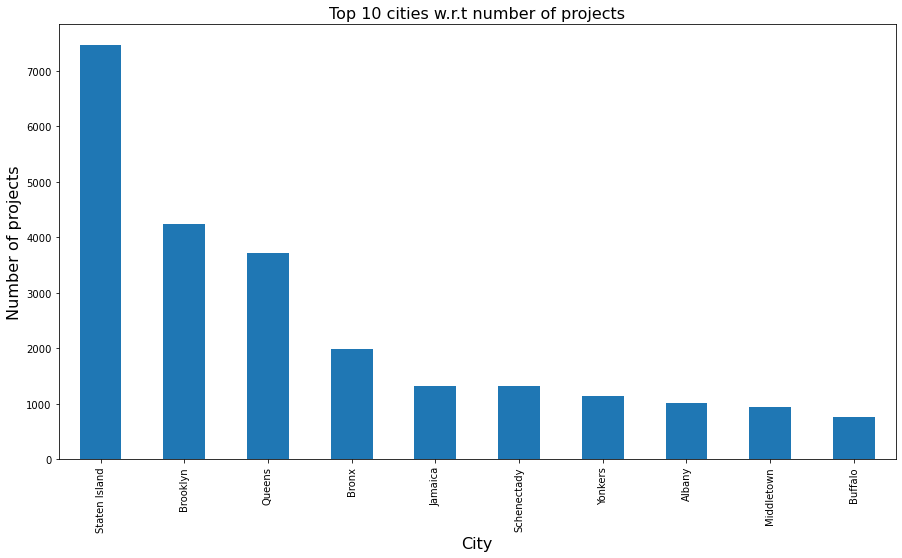

In [11]:
plt.figure(figsize = (15,8))
df['City'].value_counts()[:10].plot(kind = 'bar')
plt.title('Top 10 cities w.r.t number of projects',fontsize = 16)
plt.xlabel('City',fontsize = 16)
plt.ylabel('Number of projects',fontsize = 16)

Among the top 10 cities with most number of projects, which cities has the most project cost on an average?

In [12]:
temp = pd.DataFrame()
for city in list(df['City'].value_counts()[:10].index):
        temp = pd.concat([temp,df[df['City'] == city]])

In [13]:
temp.reset_index(drop=True,inplace=True)

Text(0, 0.5, 'Average Project Cost')

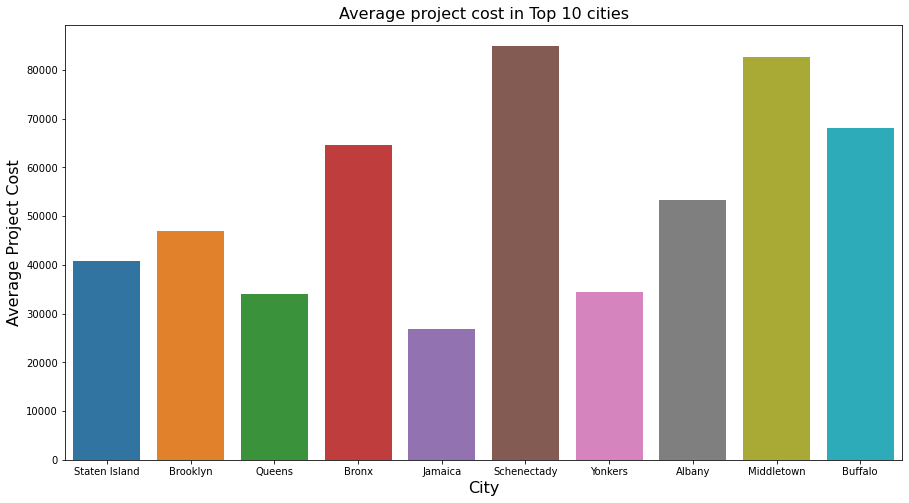

In [14]:
plt.figure(figsize = (15,8))
sns.barplot(temp['City'],temp['Project Cost'],ci=False)
plt.title('Average project cost in Top 10 cities',fontsize = 16)
plt.xlabel('City',fontsize = 16)
plt.ylabel('Average Project Cost',fontsize = 16)

Even though Staten Island has the most number of projects, the mean project cost is highest in the city of Schenectady.

## 3. What is the current status of the projects? How many projects are completed and up & running from each sector?

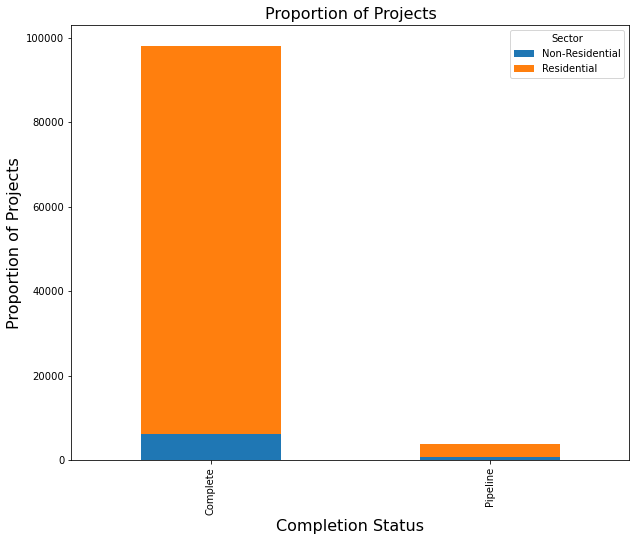

In [15]:
# df['Project Status'].value_counts(normalize=True).plot(kind = 'bar')
df_plot = df.groupby(['Sector', 'Project Status']).size().reset_index().pivot(columns='Sector', index='Project Status', values=0)
df_plot.plot(kind='bar', stacked=True,figsize = (10,8))
plt.title('Proportion of Projects',fontsize = 16)
plt.xlabel('Completion Status',fontsize = 16)
plt.ylabel('Proportion of Projects',fontsize = 16)
plt.show()

Approximately 95% projects have been completed.

## 4. More the number of photovoltaic modules installed, more would be the DC current generating capacity subsequently more would be the Expected annual electricity production in kilowatt-hours (kWh). Use an appropriate plot to verify this claim.

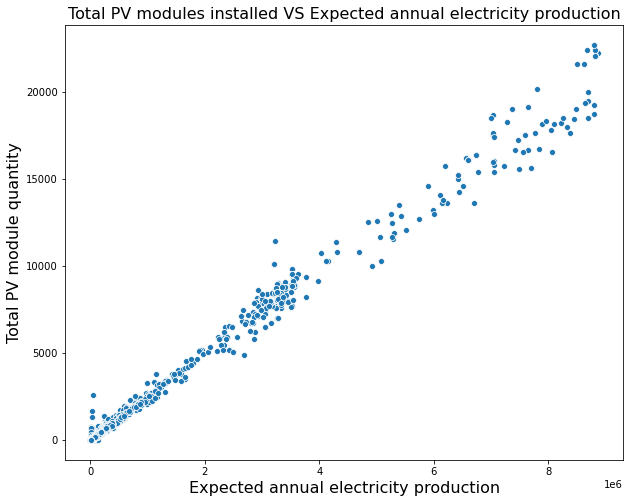

In [16]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'Expected KWh Annual Production',y = 'Total PV Module Quantity',data = df)
plt.title('Total PV modules installed VS Expected annual electricity production',fontsize = 16)
plt.xlabel('Expected annual electricity production',fontsize = 16)
plt.ylabel('Total PV module quantity',fontsize = 16)
plt.show()

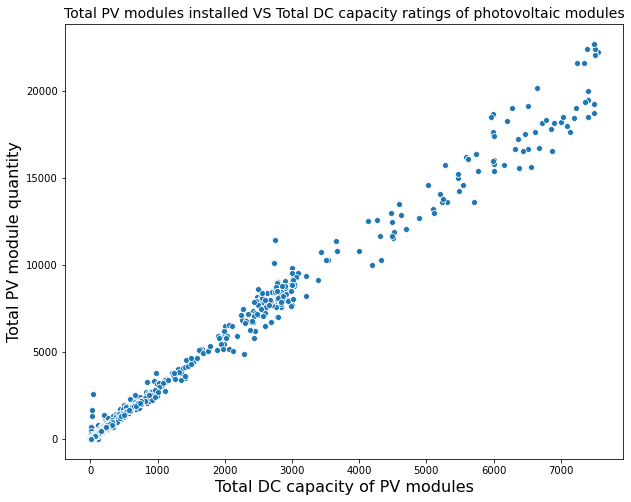

In [17]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'Total Nameplate kW DC',y = 'Total PV Module Quantity',data = df)
plt.title('Total PV modules installed VS Total DC capacity ratings of photovoltaic modules',fontsize = 14)
plt.xlabel('Total DC capacity of PV modules',fontsize = 16)
plt.ylabel('Total PV module quantity',fontsize = 16)
plt.show()

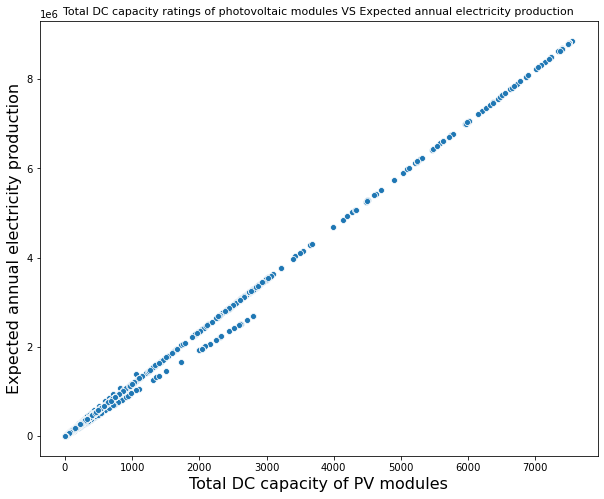

In [18]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'Total Nameplate kW DC',y = 'Expected KWh Annual Production',data = df)
plt.title('Total DC capacity ratings of photovoltaic modules VS Expected annual electricity production',fontsize = 11)
plt.xlabel('Total DC capacity of PV modules',fontsize = 16)
plt.ylabel('Expected annual electricity production',fontsize = 16)
plt.show()

## 5. Are higher costing projects estimated to produce more electricity in terms of annual production?

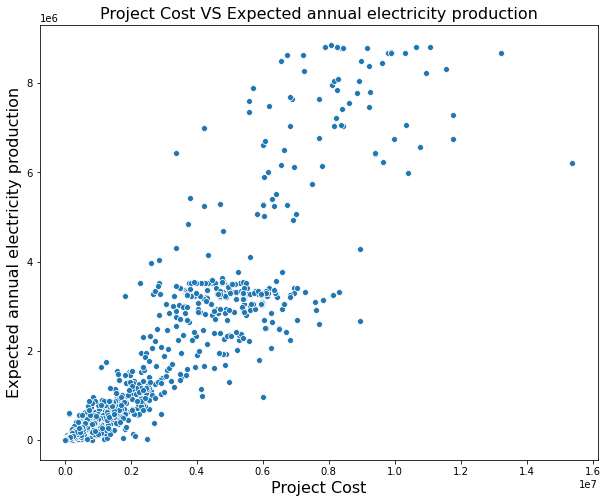

In [19]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'Project Cost',y = 'Expected KWh Annual Production',data = df)
plt.title('Project Cost VS Expected annual electricity production',fontsize = 16)
plt.xlabel('Project Cost',fontsize = 16)
plt.ylabel('Expected annual electricity production',fontsize = 16)
plt.show()

## 6. Amongst the completed projects, which project contractor seems to have exceeded the deadline of 5 years to complete the project since the date of application?

In [20]:
df_completed_proj = df[df['Project Status'] == 'Complete']
df_completed_proj.reset_index(drop = True,inplace = True)

In [21]:
df_completed_proj['Project Duration'] = df_completed_proj['Date Completed'] - df_completed_proj['Date Application Received']

In [22]:
df_completed_proj['Project Duration'] = list(map(lambda x : x.days, df_completed_proj['Project Duration']))

In [23]:
print(df_completed_proj['Project Duration'].sort_values(ascending = False).index)

Int64Index([19610, 63925, 64295, 57374, 23442, 27171, 17510, 62654, 19164,
            18891,
            ...
            11114, 55515, 60526, 58206, 64154, 66555, 64864, 60870, 58474,
             5514],
           dtype='int64', length=98048)


In [24]:
df_completed_proj.loc[[19610, 63925, 64295, 57374, 23442, 27171, 17510, 62654, 19164,18891]]['Project Duration']/365

19610    6.194521
63925    4.926027
64295    4.926027
57374    4.884932
23442    4.846575
27171    4.819178
17510    4.810959
62654    4.805479
19164    4.695890
18891    4.547945
Name: Project Duration, dtype: float64

In [25]:
df_completed_proj.loc[[19610]]['Contractor']

19610    Solar Liberty Energy Systems, Inc.
Name: Contractor, dtype: object

How much time did similar projects take for completion on an average?

In [26]:
df_completed_proj.loc[[19610]]

,City,County,Sector,Program Type,Electric Utility,Purchase Type,Date Application Received,Date Completed,Project Status,Total Inverter Quantity,Total PV Module Quantity,Project Cost,$Incentive,Total Nameplate kW DC,Expected KWh Annual Production,Affordable Solar,Community Distributed Generation,Contractor,Project Duration
19610,Buffalo,Erie,Non-Residential,Residential/Small Commercial,National Grid,Lease,2013-02-26,2019-05-07,Complete,1.0,168.0,320775.0,63840.0,42.56,49959,No,No,"Solar Liberty Energy Systems, Inc.",2261


In [27]:
df_completed_proj[(df_completed_proj['City'] == 'Buffalo') 
                  & (df_completed_proj['Sector'] == 'Non-Residential')
                 & (df_completed_proj['Purchase Type'] == 'Lease')
                 & (df_completed_proj['Electric Utility'] == 'National Grid')
                 & (df_completed_proj['Project Duration'] != 2261)]['Project Duration'].mean()

305.0833333333333

Contractor named "Solar Liberty Energy Systems, Inc." has taken the highest time(more than 6 years) to install the project and get it up & running. More details regarding the reasons for the delay in completion of the project should be discussed with the contractor. It takes just about 1 year to implement similar projects. Whereas this project took about 6 years to complete.

How much money was invested in similar projects on an average?

In [28]:
df_completed_proj[(df_completed_proj['City'] == 'Buffalo') 
                  & (df_completed_proj['Sector'] == 'Non-Residential')
                 & (df_completed_proj['Purchase Type'] == 'Lease')
                 & (df_completed_proj['Electric Utility'] == 'National Grid')
                 & (df_completed_proj['Project Duration'] != 2261)]['Project Cost'].mean()

233325.13249999998

On an average, approx 233 thousand dollars were invested in similar projects, but about 320 thousand dollars were invested in this specific project which is more than the average.

## 7. Which type of program seems to have a higher cost of project? Does it adhere with the expected annual electricity production?

Text(0, 0.5, 'Average Project Cost')

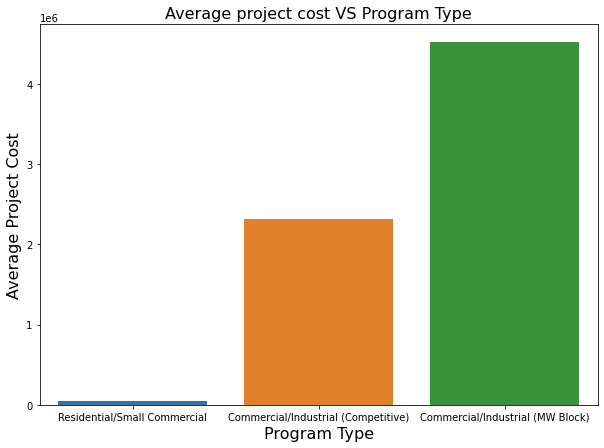

In [29]:
plt.figure(figsize = (10,7))
sns.barplot(df['Program Type'],df['Project Cost'],ci=False)
plt.title('Average project cost VS Program Type',fontsize = 16)
plt.xlabel('Program Type',fontsize = 16)
plt.ylabel('Average Project Cost',fontsize = 16)

Text(0, 0.5, 'Average Expected KWh Annual Production')

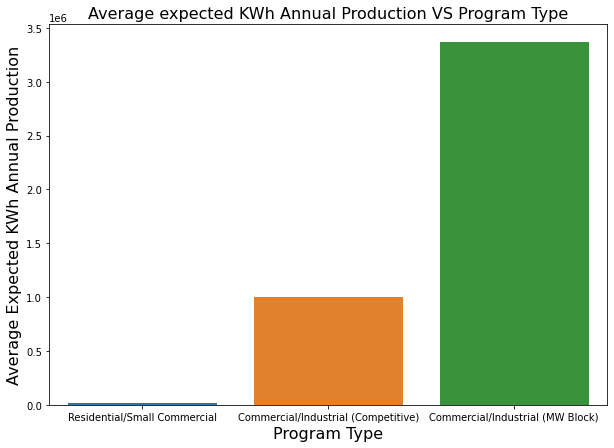

In [30]:
plt.figure(figsize = (10,7))
sns.barplot(df['Program Type'],df['Expected KWh Annual Production'],ci=False)
plt.title('Average expected KWh Annual Production VS Program Type',fontsize = 16)
plt.xlabel('Program Type',fontsize = 16)
plt.ylabel('Average Expected KWh Annual Production',fontsize = 16)

As we can see from the plots, the project cost is higher for "Commercial/Industrial(MegaWatt Block)" program type which is quite obvious as it is expected to generate the highest amount of annual electricity production.

## 8. Do incentives depend on the cost of the project?

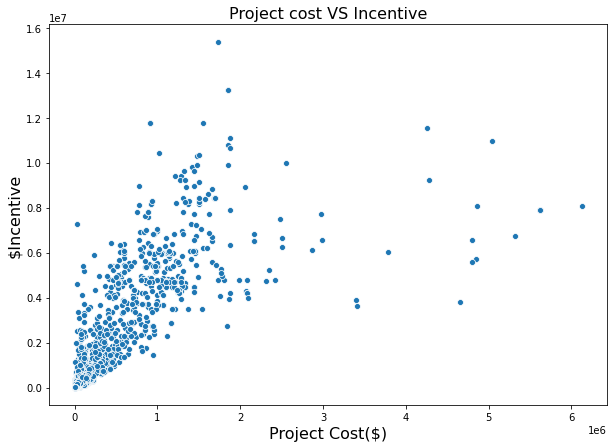

In [31]:
plt.figure(figsize = (10,7))
sns.scatterplot(x = df['$Incentive'],y = df['Project Cost'],ci=False)
plt.title('Project cost VS Incentive',fontsize = 16)
plt.xlabel('Project Cost($)',fontsize = 16)
plt.ylabel('$Incentive',fontsize = 16)
plt.show()

There seems to be a positive corelation between the project cost and the incentives. But this might not actually be the only criteria for deiding the amount of incentive. Remember the phrase, "Correlation does not imply causation". Its highly likely that there can be other factors involved to to decide the incentive amount.

## 9. Every city can have multiple electric utilities. How can we visualize the contribution of different electric utilities to the cost of the project for the top 10 cities we previously identified?

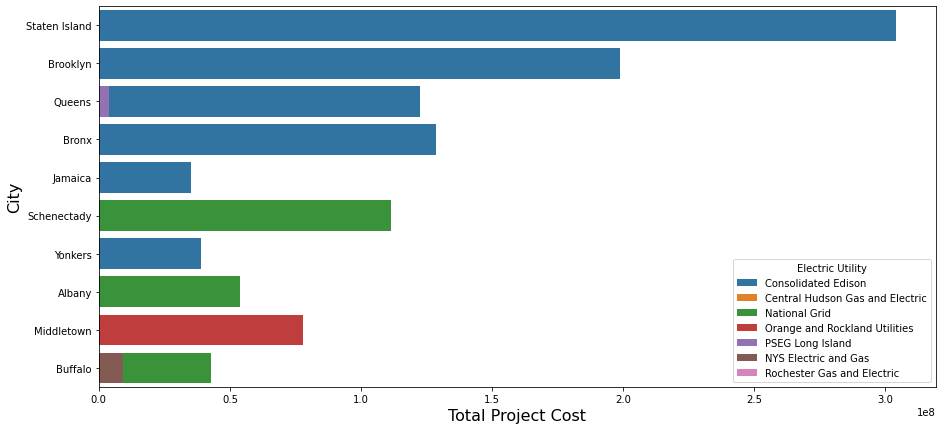

In [32]:
plt.figure(figsize = (15,7))
sns.barplot(x = temp['Project Cost'],y = temp['City'],hue = temp['Electric Utility'],ci=False,orient='h',dodge=False,estimator=sum)
plt.xlabel('Total Project Cost',fontsize = 16)
plt.ylabel('City',fontsize = 16)
plt.show()

This data can further be refined and used for prediction of the project cost as well as the incentives. 

This dataset has a vast scope of drilling down to a specific case/situation and analysing the data revolving around that case as we did in case of identifying the project contractor who did not meet the 5 year completion deadline. 

This is just an introduction to what can be the possibilities of exploring a certain dataset to find meaningful insights w.r.t cost analysis. If you have set an objective in mind, you can narrow down this analysis to just follow the path to reach the objective which will also save a lot of time.